In [28]:
import numpy as np
import pandas as pd
import quandl
df = quandl.get('WIKI/GOOGL')
import math
import datetime
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [29]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2016-10-18,814.21,828.810,813.330,821.49,2267853.0
2016-10-19,824.52,829.810,823.205,827.09,1437490.0
2016-10-20,827.56,828.465,820.550,821.63,1376677.0
2016-10-21,820.00,824.290,818.310,823.73,1563718.0
2016-10-24,830.09,837.940,829.040,835.74,1423428.0


In [30]:
df['High_Close']= (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['Open_Close']= (df['Adj. Open']-df['Adj. Close'])/df['Adj. Open']*100.0
df=df[['Adj. Close','High_Close','Open_Close','Adj. Volume']]
df.tail()

,Adj. Close,High_Close,Open_Close,Adj. Volume
Date,,,,
2016-10-18,821.49,0.891064,-0.894118,2267853.0
2016-10-19,827.09,0.328864,-0.311697,1437490.0
2016-10-20,821.63,0.831883,0.716564,1376677.0
2016-10-21,823.73,0.067983,-0.454878,1563718.0
2016-10-24,835.74,0.263240,-0.680649,1423428.0


In [31]:
#Shifing label col to tomorrow's close value so  features will be Adj. Close 	High_Close 	Open_Close 	Adj. Volume 
# and label (to be predicted) is tomorrow's Adj. Close value
df['label_tomorrow_Adj. Close']= df['Adj. Close'].shift(-1)
#df.dropna(inplace=True)

df.tail()


,Adj. Close,High_Close,Open_Close,Adj. Volume,label_tomorrow_Adj. Close
Date,,,,,
2016-10-18,821.49,0.891064,-0.894118,2267853.0,827.09
2016-10-19,827.09,0.328864,-0.311697,1437490.0,821.63
2016-10-20,821.63,0.831883,0.716564,1376677.0,823.73
2016-10-21,823.73,0.067983,-0.454878,1563718.0,835.74
2016-10-24,835.74,0.263240,-0.680649,1423428.0,NaN


In [34]:
# Other variables are features to classifier 
x= np.array(df.drop(['label_tomorrow_Adj. Close'],1))
#x is set of features
#selecting all elements except last
x=x[:-1]
# y / Tomorrow's Ajd. Close value is label to classifier
#selecting all elements except last
y = np.array(df['label_tomorrow_Adj. Close'])
y=y[:-1]

#Scaling data to same scale
#x= preprocessing.scale(x)
 

3067

In [36]:
#Spliting data into test train set
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.5)
#Linear Regression Classifier
clf = LinearRegression(n_jobs=-1)
#Support vector regression classifier
#clf =svm.SVR()
#training classifier on train data
clf.fit(x_train,y_train)
#testing model/classifier on test data
accuracy = clf.score(x_test,y_test)
print(accuracy)


0.998774812893


3067

In [38]:
last_day=df.iloc[-1:,:4]
forecast_set= clf.predict(last_day)
print(forecast_set)


[ 835.77469929]


3067

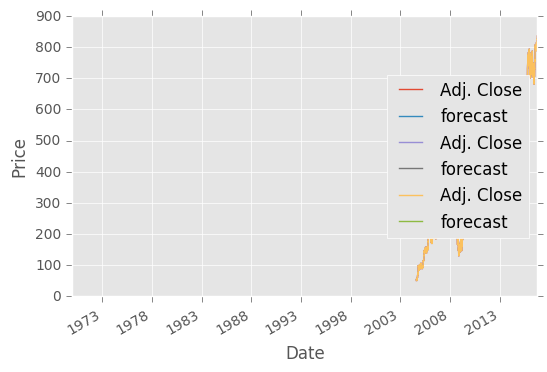

In [23]:
df['forecast']= np.nan
last_date=df.iloc[-1].name
last_day=last_date.second
one_day=86400
next_day=one_day+last_day
for i in forecast_set:
    next_date= datetime.datetime.fromtimestamp(next_day)
    next_day=next_day+one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=7)
plt.xlabel('Date')
plt.ylabel('Price')
#plt.axis([2003,2016,0,1000])
plt.show()


In [24]:
df.iloc[-2:-1]

,Adj. Close,High_Close,Open_Close,Adj. Volume,label_tomorrow_Adj. Close,forecast
2016-10-24,835.74,0.26324,-0.680649,1423428.0,NaN,NaN


In [25]:
len(df)

3069